### Assignment 9: Diabetes Classifier
##### Name: Steven Fernandez | Date: July 28, 2021 | Course: 4045-002, COP 4045-001: Python Programming 

#### In this assignment you will follow the same steps as in Chapter 10 of the textbook.

In [16]:
"""
1. Implement and test the 5 main functions and 4 main data structures from Chapter 10.
"""

'\n1. Implement and test the 5 main functions and 4 main data structures from Chapter 10.\n'

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

###### Functions and Data Structures

In [101]:
def make_training_set(file_name): #Function 1 
    training_set_list = []
    training_file = open(file_name) 
    next(training_file) #Skip the header
    for line_str in training_file: #Get the values and storage them in a tuple then in a list
        Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome= line_str.split(',')
        patient_tuple= int(Outcome), int(Pregnancies), int(Glucose), int(BloodPressure), int(SkinThickness), int(Insulin), float(BMI), float(DiabetesPedigreeFunction), int(Age)
        training_set_list.append(patient_tuple)
    return training_set_list

In [102]:
def make_test_set(file_name): #Function 2
    test_set_list = []
    test_file = open(file_name)
    next(test_file) #Skip the header
    for line_str in test_file: #Get the values and storage them in a tuple then in a list
        Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome= line_str.split(',')
        patient_tuple= int(Outcome), int(Pregnancies), int(Glucose), int(BloodPressure), int(SkinThickness), int(Insulin), float(BMI), float(DiabetesPedigreeFunction), int(Age)
        test_set_list.append(patient_tuple)
    return test_set_list

In [103]:
def sum_lists(list1,list2):
    sums_list = []
    for index in range(8):
        sums_list.append(list1[index]+list2[index])
    return sums_list

def make_averages(sums_list,total_int):
    averages_list = []
    for value_int in sums_list:
        averages_list.append(value_int/total_int)
    return averages_list

def train_classifier(training_set_list): #Function 3
    nonediabetes_sums_list=[0]*8 #it multiplies with 8, because the dataset has 8 attributes.
    nonediabetes_count=0
    diabetes_sums_list=[0]*8 #it multiplies with 8, because the dataset has 8 attributes.
    diabetes_count=0
    
    for patient_tuple in training_set_list:
        if patient_tuple[0]==0: 
            nonediabetes_sums_list=sum_lists(nonediabetes_sums_list,patient_tuple[1:])
            nonediabetes_count= nonediabetes_count+1
        else: 
            diabetes_sums_list=sum_lists(diabetes_sums_list,patient_tuple[1:])
            diabetes_count=diabetes_count+1

    nonediabetes_averages_list=make_averages(nonediabetes_sums_list,nonediabetes_count)
    diabetes_averages_list=make_averages(diabetes_sums_list,diabetes_count)
    classifier_list=make_averages(sum_lists(nonediabetes_averages_list,diabetes_averages_list),2)

    return classifier_list

In [104]:
def classify_test_set_list(test_set_list, classifier_list): #Function 4
    result_list = [] 
    
    for patient_tuple in test_set_list:
        nonediabetes_count= 0
        diabetes_count= 0
        Outcome= patient_tuple[0]
        
        for index in range(8):
            if patient_tuple[index] > classifier_list[index]:
                diabetes_count= diabetes_count+1
            else:
                nonediabetes_count= nonediabetes_count+1
        result_tuple = (nonediabetes_count, diabetes_count,Outcome)
        result_list.append(result_tuple)
    return result_list

In [117]:
def report_results(result_list): #Function 5
    total_count= 0
    inaccurate_count = 0
    
    for result_tuple in result_list:
        nonediabetes_count, diabetes_count, Outcome = result_tuple[:]
        total_count=total_count+1
        
        if (nonediabetes_count>diabetes_count) and (Outcome == 1): #Here, make a little change to be more accurate
            inaccurate_count= inaccurate_count+1
        elif (nonediabetes_count<diabetes_count) and (Outcome == 0): 
            inaccurate_count= inaccurate_count+1
    print("Of ",total_count," patients, there were ",inaccurate_count," inaccuracies")

#### Main Program

In [118]:
#First, the dataset was divided into two files, one for training and another one for testing.
#80% for training and 20% for testing like we normally do with scikit learn for training and testing machine learning models.

training_set_list= make_training_set('diabetes_train.csv')
test_set_list= make_test_set('diabetes_test.csv')
classifier_list= train_classifier(training_set_list)
results_list = classify_test_set_list(test_set_list,classifier_list)
report_results(results_list)

Of  155  patients, there were  32  inaccuracies


##### Scatter plots to visualize at least two features of the training and test set

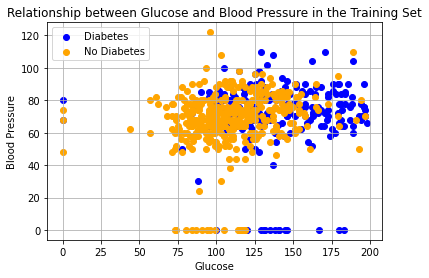

In [107]:
D= []
ND= []
for i in training_set_list:
    if i[0]==1:
        D.append(i[2:4])
    else:
        ND.append(i[2:4])
Dx= []
Dy= []
for i in D:
    Dx.append(i[0])
    Dy.append(i[1])
    
NDx= []
NDy= []
for i in ND:
    NDx.append(i[0])
    NDy.append(i[1])
    
    
plt.scatter(Dx, Dy, color='blue', label='Diabetes')
plt.scatter(NDx, NDy,color='orange', label='No Diabetes')
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.legend()
plt.title("Relationship between Glucose and Blood Pressure in the Training Set")
plt.grid("on")
plt.show()

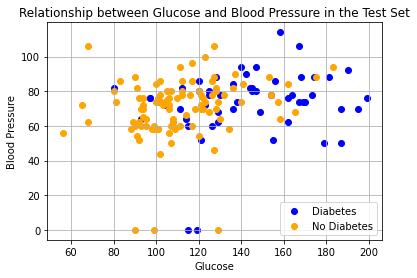

In [108]:
D= []
ND= []
for i in test_set_list:
    if i[0]==1:
        D.append(i[2:4])
    else:
        ND.append(i[2:4])
Dx= []
Dy= []
for i in D:
    Dx.append(i[0])
    Dy.append(i[1])
    
NDx= []
NDy= []
for i in ND:
    NDx.append(i[0])
    NDy.append(i[1])
    
    
plt.scatter(Dx, Dy, color='blue', label='Diabetes')
plt.scatter(NDx, NDy,color='orange', label='No Diabetes')
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.legend()
plt.title("Relationship between Glucose and Blood Pressure in the Test Set")
plt.grid("on")
plt.show()

#### Conclusions
###### - Before start coding, it's important to understand the dataset: how is it storaged, how many attributes, how many rows, what kind of atributtes has, etc.
##### - Because it's a classification problem, it's important to differentiate the targets: 0= No Diabetes, 1= Diabetes to make an accurate classification.
##### -Use scatter plots to visualize the relationship between features.
##### -Divide the dataset into two sets: training and testing, so the classifier gives more reliable results.
##### - Use the right data structures, so it's easier to do debugging of the code.

##### References
###### -Punch & Enbody (2017),The practice of computing using python, Chapter 10.